# Post-processing results

Assuming you have run 

```python detect.py --weights <model weights> --cfg <model cfg> --source <path to validation dir> --save-txt```

you can run the following cells

In [85]:
TXT_DIR = "runs/01_pipeline_1/validation_predictions"

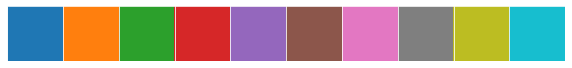

In [108]:
import os, glob

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
current_palette = sns.color_palette()
sns.palplot(current_palette)
plt.show()

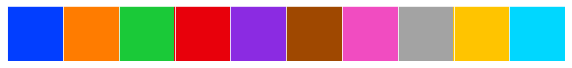

In [133]:
palette = sns.color_palette("bright", 10)
sns.palplot(palette)
plt.show()

In [134]:
sns.set_palette(new_palette)

In [135]:
txt_reg = os.path.join(TXT_DIR, "*.txt")
txt_files = glob.glob(txt_reg)

def parse_data(data: list):
    data = [row.replace('\n', '').split() for row in data]
    for i, row in enumerate(data):
        data[i][0] = int(row[0])
        data[i][1] = float(row[1])
        data[i][2] = float(row[2])
        data[i][3] = float(row[3])
        data[i][4] = float(row[4])
    return data

global_data = list()
for txt_file in txt_files:
    with open(txt_file) as f:
        data = f.readlines()
    data = parse_data(data)
    global_data += data
global_data = np.array(global_data)

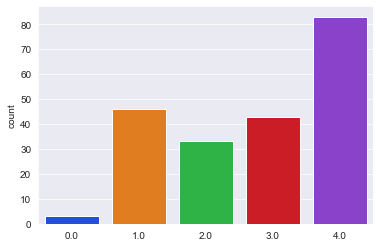

In [136]:
class_predictions = global_data[:,0]
sns.countplot(x=class_predictions)
plt.show()

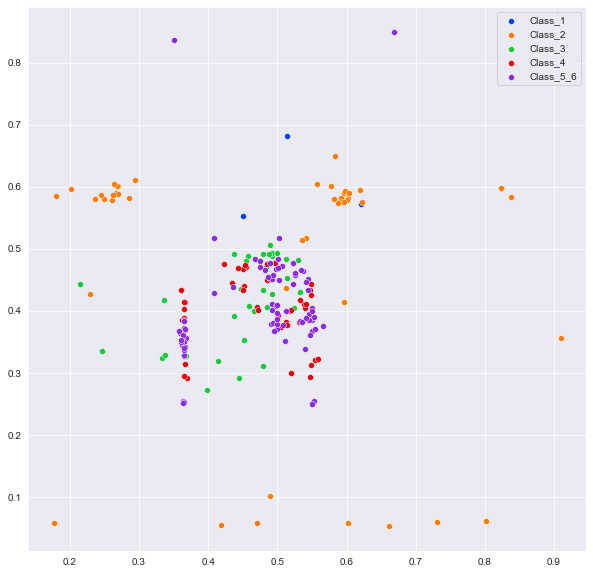

In [138]:
labels = ["Class_1", "Class_2", "Class_3", "Class_4", "Class_5_6"]

plt.figure(figsize=(10,10))
for i in range(5):
    class_data = global_data[global_data[:,0] == i]
    
    x_pos = class_data[:,1]
    y_pos = class_data[:,2]
    sns.scatterplot(x=x_pos, y=y_pos, color=palette[i])
plt.legend(labels)
plt.show()

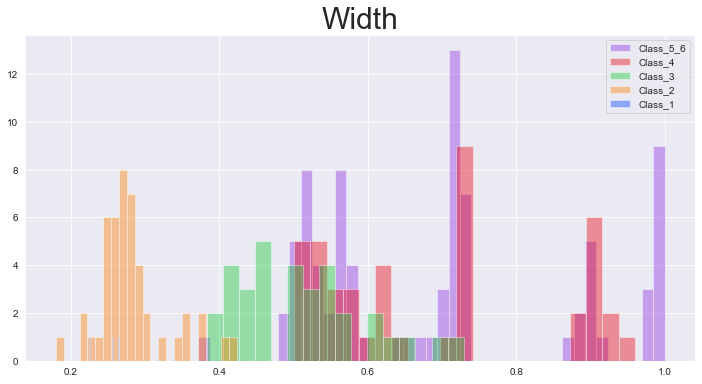

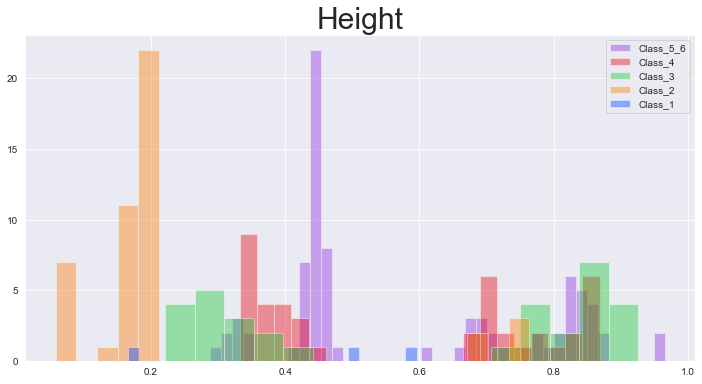

In [185]:
labels = ["Class_1", "Class_2", "Class_3", "Class_4", "Class_5_6"]

legend_vec = list()
plt.figure(figsize=(12,6))
plt.title("Prediction: BBox Width", fontsize=30)
for i in range(5):
    idx = 4-i
    color = palette[idx]
    
    class_data = global_data[global_data[:,0] == idx]
    width = class_data[:,3]
    if idx == 0:
        sns.distplot(width, bins=25, kde=False, color=color)
    else:
        sns.distplot(width, bins=int(0.5*len(width)), kde=False, color=color)
        
    legend_vec.append(labels[idx])
plt.legend(legend_vec)
plt.show()

legend_vec = list()
plt.figure(figsize=(12,6))
plt.title("Prediction: BBox Height", fontsize=30)
for i in range(5):
    idx = 4-i
    color = palette[idx]
    
    class_data = global_data[global_data[:,0] == idx]
    height = class_data[:,4]
    
    if idx == 0:
        sns.distplot(height, bins=25, kde=False, color=color)
    else:
        sns.distplot(height, bins=int(0.5*len(height)), kde=False, color=color)
        
    legend_vec.append(labels[idx])
plt.legend(legend_vec)
plt.show()



c:\users\sefuda\.conda\envs\yolov3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


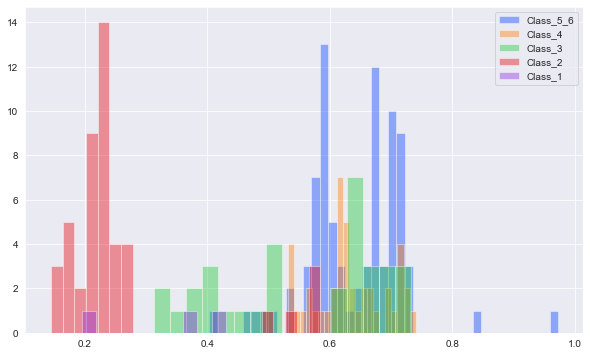

In [189]:
#labels = ["Class_1", "Class_2", "Class_3", "Class_4", "Class_5_6"]
labels = ["Class_5_6", "Class_4", "Class_3", "Class_2", "Class_1"]

plt.figure(figsize=(10,6))
for i in range(5):
    class_data = global_data[global_data[:,0] == 4-i]
    
    width = class_data[:,3]
    height = class_data[:,4] 
    length = (width+height)/2
    
    if 4-i == 0:
        sns.distplot(length, bins=10, kde=False)
    else:
        sns.distplot(length, bins=int(0.5*len(length)), kde=False)
plt.legend(labels)
plt.show()

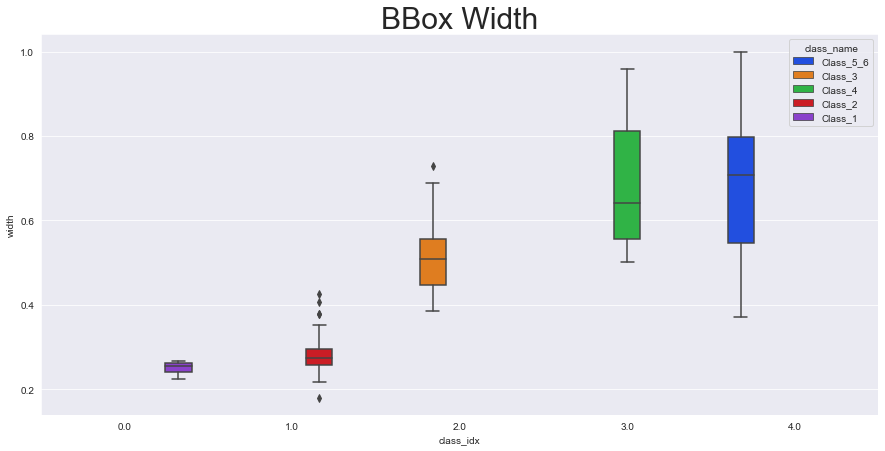

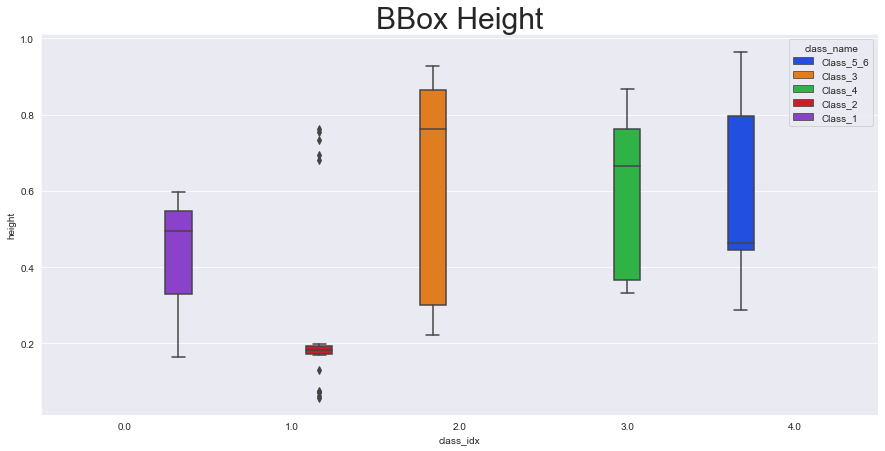

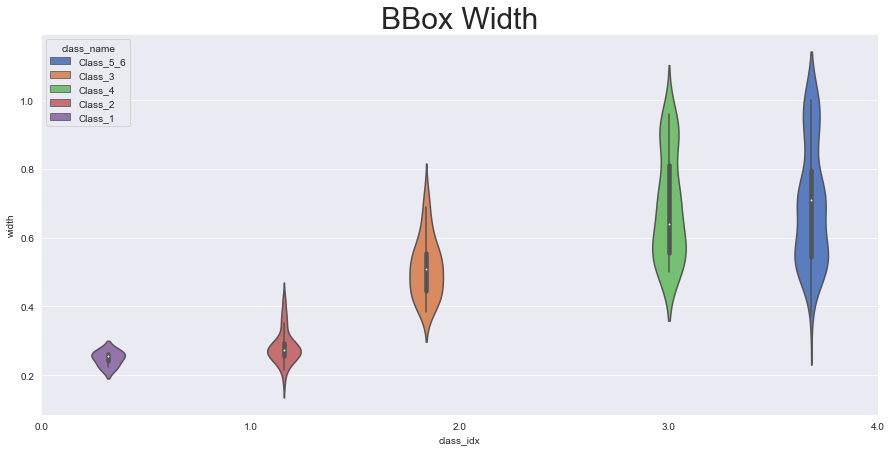

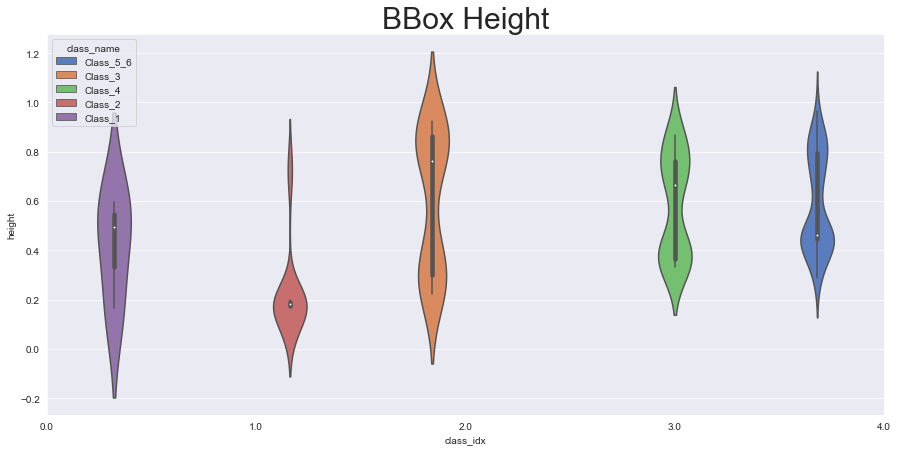

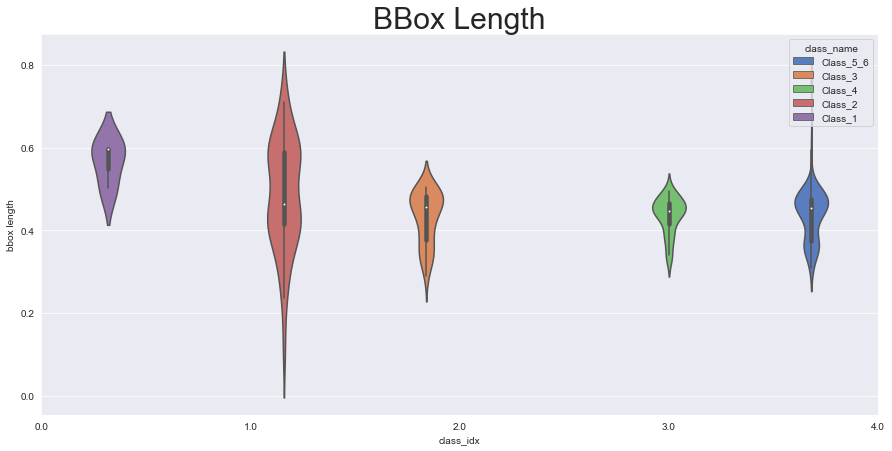

In [190]:
import pandas as pd
df = pd.DataFrame(global_data, columns=["class_idx", "x", "y","width","height"])

idx2name = {
    0: "Class_1",
    1: "Class_2",
    2: "Class_3",
    3: "Class_4",
    4: "Class_5_6"
}
def get_name(idx):
    return idx2name[idx]
df["class_name"] = df["class_idx"].apply(get_name)
df["bbox length"] = (df["x"]+df["y"])/2

plt.figure(figsize=(15,7))
plt.title("Prediction: BBox Width", fontsize=30)
sns.boxplot(data=df, x="class_idx", y="width", hue="class_name")
plt.show()

plt.figure(figsize=(15,7))
plt.title("Prediction: BBox Height", fontsize=30)
sns.boxplot(data=df, x="class_idx", y="height", hue="class_name")
plt.show()

plt.figure(figsize=(15,7))
plt.title("Prediction: BBox Width", fontsize=30)
ax = sns.violinplot(x="class_idx", y="width", hue="class_name", data=df, palette="muted")
plt.xlim([0,4])
plt.show()

plt.figure(figsize=(15,7))
plt.title("Prediction: BBox Height", fontsize=30)
ax = sns.violinplot(x="class_idx", y="height", hue="class_name", data=df, palette="muted")
plt.xlim([0,4])
plt.show()

plt.figure(figsize=(15,7))
plt.title("Prediction: BBox Length", fontsize=30)
ax = sns.violinplot(x="class_idx", y="bbox length", hue="class_name", data=df, palette="muted")
plt.xlim([0,4])
plt.show()